In [24]:
import pandas as pd
import numpy as np
import sklearn

In [27]:
#bank = pd.read_csv('bank.csv')
#print(bank)

In [3]:
#bank.head()

In [4]:
#bank.describe()

In [5]:
#bank.keys()

In [6]:
#import csv

#with open('bank.csv', 'rt', newline='') as csvfile:
#   csvreader = csv.reader(csvfile, delimiter=';', quotechar='"')
    
#    for row in csvreader:
#        print(', '.join(row))"""

In [6]:
# bdp = bank_data_partial

#bdp = pd.DataFrame.from_csv('bank.csv', header=0, sep=';')
#bdp = pd.DataFrame.from_csv('bank.csv', header=0, sep=';', index_col=False, tupleize_cols=False)
bdp = pd.read_csv('bank.csv', sep=';', index_col=False)
bdp.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
bdp.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
bdp.keys()

Index([u'age', u'job', u'marital', u'education', u'default', u'balance', u'housing', u'loan', u'contact', u'day', u'month', u'duration', u'campaign', u'pdays', u'previous', u'poutcome', u'y'], dtype='object')

In [9]:
#bdp['pdays'].unique() #results are yuck

In [54]:
#bdp['pdays']

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

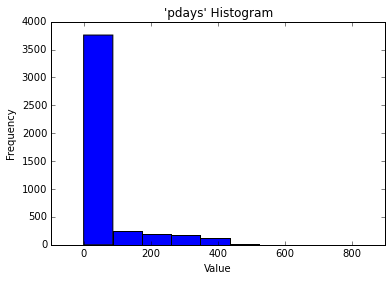

In [10]:
plt.hist(bdp['pdays'])
plt.title("'pdays' Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
# why doesn't histogram show "-1" values for 'pdays'?

In [55]:
#bdp['pdays'].value_counts()

In [42]:
#bdp.apply(pd.unique) / bdp.apply(np.unique)

# pandas.dataframe.apply()' doesn't seem to work, results in the following: 
# "ValueError: Shape of passed values is (17,), indices imply (17, 4521)"
# whether I don't include parameter [axis], or whether I designate [axis] as 0 or 1

In [14]:
bdp['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [14]:
bdp['previous'].unique()

array([ 0,  4,  1,  3,  2,  5, 20,  7,  6, 10,  9,  8, 18, 19, 12, 13, 11,
       14, 15, 24, 17, 22, 23, 25], dtype=int64)

In [16]:
bdp['poutcome'].unique() #what is 'other', a 'call me back' reply?

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [15]:
# It'd be good to know what the 'unknown' and 'other' responses for 'poutcome' were composed of,
# in terms of 'pdays'
bdp.poutcome.value_counts()
#the huge number of 'unknown' entries is a problem

unknown    3705
failure     490
other       197
success     129
dtype: int64

In [ ]:
# historgram of 'pdays' or some other numerical measure with poutcome[unknown] to determine what
# the 'unknown' responses mean (?)

In [ ]:
"""
Question 1: Describe features
Answer: In raw form, the data are all strings. However, placing the data within a dataframe obviously
changes that. "Age", "balance", "day", "duration", "campaign", "pdays" and "previous" are all continuous
variables. All of the rest are categorical, though some of them have potential to be converted into ordinal,
binary and even continuous variables, depending on how we want to undertake the analysis.

"""

In [27]:
from sklearn import preprocessing, feature_extraction
#from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#from sklearn.feature_extraction import DictVectorizer

In [10]:
bdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)

In [ ]:
# bdp.keys():
#['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 
#'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

In [17]:
#bdp_catcols = bdp.job, bdp.marital, bdp.education, bdp.default, bdp.housing, bdp.loan, bdp.contact, bdp.month, bdp.poutcome, bdp.y
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
cat_dict = bdp[cat_cols].to_dict(outtype='records')
cat_dict[0]

{'contact': 'cellular',
 'default': 'no',
 'education': 'primary',
 'housing': 'no',
 'job': 'unemployed',
 'loan': 'no',
 'marital': 'married',
 'month': 'oct',
 'poutcome': 'unknown',
 'y': 'no'}

In [29]:
# DictVectorizer transforms dictionary to binary one-hot encoded array for each row

vec = feature_extraction.DictVectorizer() #<-why didn't this work when I included 'sklearn'? said 'sklearn' not defined
cat_vector = vec.fit_transform(cat_dict).toarray()
cat_vector[:5]

array([[ 1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  1.,  0.],
       [ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0

In [31]:
# Separate dataframe with one-hot encoded data, set column names by calling get_feature_names

bdp_vector = pd.DataFrame(cat_vector)
vector_cols = vec.get_feature_names()
vector_cols

['contact=cellular',
 'contact=telephone',
 'contact=unknown',
 'default=no',
 'default=yes',
 'education=primary',
 'education=secondary',
 'education=tertiary',
 'education=unknown',
 'housing=no',
 'housing=yes',
 'job=admin.',
 'job=blue-collar',
 'job=entrepreneur',
 'job=housemaid',
 'job=management',
 'job=retired',
 'job=self-employed',
 'job=services',
 'job=student',
 'job=technician',
 'job=unemployed',
 'job=unknown',
 'loan=no',
 'loan=yes',
 'marital=divorced',
 'marital=married',
 'marital=single',
 'month=apr',
 'month=aug',
 'month=dec',
 'month=feb',
 'month=jan',
 'month=jul',
 'month=jun',
 'month=mar',
 'month=may',
 'month=nov',
 'month=oct',
 'month=sep',
 'poutcome=failure',
 'poutcome=other',
 'poutcome=success',
 'poutcome=unknown',
 'y=no',
 'y=yes']

In [34]:
# Drop categorical columns % join new one-hot dataframe w/ original dataframe

bdp_vector.columns = vector_cols
bdp_vector.index = bdp.index

bdp = bdp.drop(cat_cols, axis=1)
bdp = bdp.join(bdp_vector)
bdp.head()

,age,balance,day,duration,campaign,pdays,previous,contact=cellular,contact=telephone,contact=unknown,...,month=may,month=nov,month=oct,month=sep,poutcome=failure,poutcome=other,poutcome=success,poutcome=unknown,y=no,y=yes
0,30,1787,19,79,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
1,33,4789,11,220,1,339,4,1,0,0,...,1,0,0,0,1,0,0,0,1,0
2,35,1350,16,185,1,330,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,30,1476,3,199,4,-1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,59,0,5,226,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0


In [35]:
bdp.describe()

,age,balance,day,duration,campaign,pdays,previous,contact=cellular,contact=telephone,contact=unknown,...,month=may,month=nov,month=oct,month=sep,poutcome=failure,poutcome=other,poutcome=success,poutcome=unknown,y=no,y=yes
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,...,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.640566,0.066578,0.292856,...,0.309224,0.086043,0.017695,0.011502,0.108383,0.043574,0.028534,0.819509,0.884760,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.479888,0.249318,0.455123,...,0.462225,0.280458,0.131856,0.106640,0.310898,0.204169,0.166510,0.384638,0.319347,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1]:
#import statsmodels.api as sm

#convtd_cats = sm.tools.categorical(bdp_cats, drop=True)
#int_job = sm.tools.categorical(bdp.job, drop=True) # --> OK, this function is not useful for now

In [16]:
#v = DictVectorizer(sparse=False)
#X = v.fit_transform(bdp_categs)
#X

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [30]:
#v.inverse_transform(X) #doesn't seem right

In [37]:
#le = preprocessing.LabelEncoder()
#le.fit(bdp.columns)

LabelEncoder()

In [38]:
#le.transform(bdp.columns.get_values())

array([ 0,  9, 11,  7,  5,  1,  8, 10,  3,  4, 12,  6,  2, 13, 15, 14, 16], dtype=int64)

In [39]:
#le.classes_

array(['age', 'balance', 'campaign', 'contact', 'day', 'default',
       'duration', 'education', 'housing', 'job', 'loan', 'marital',
       'month', 'pdays', 'poutcome', 'previous', 'y'], dtype=object)